In [1]:
import pandas as pd
import numpy as np

In [2]:
da=pd.read_csv("flight_ticket.csv")
da

,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,Air Asia,14:40,22:25,7h 45m,Non Stop,"5,953"
1,1,Air Asia,21:25,06:45,9h 20m,Non Stop,"5,953"
2,2,Air Asia,21:25,07:15,9h 50m,Non Stop,"5,953"
3,3,Air Asia,20:45,06:45,10h 00m,Non Stop,"5,953"
4,4,Air Asia,20:45,07:15,10h 30m,Non Stop,"5,953"
...,...,...,...,...,...,...,...
1995,1995,Go First,09:10,16:15,7h 05m,Non Stop,"5,942"
1996,1996,Air India,07:00,09:05,2h 05m,Non Stop,"5,942"
1997,1997,IndiGo,06:30,08:40,2h 10m,Non Stop,"5,942"
1998,1998,Air India,08:00,10:10,2h 10m,Non Stop,"5,942"


In [3]:
df=pd.DataFrame(data=da)
df

,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,Air Asia,14:40,22:25,7h 45m,Non Stop,"5,953"
1,1,Air Asia,21:25,06:45,9h 20m,Non Stop,"5,953"
2,2,Air Asia,21:25,07:15,9h 50m,Non Stop,"5,953"
3,3,Air Asia,20:45,06:45,10h 00m,Non Stop,"5,953"
4,4,Air Asia,20:45,07:15,10h 30m,Non Stop,"5,953"
...,...,...,...,...,...,...,...
1995,1995,Go First,09:10,16:15,7h 05m,Non Stop,"5,942"
1996,1996,Air India,07:00,09:05,2h 05m,Non Stop,"5,942"
1997,1997,IndiGo,06:30,08:40,2h 10m,Non Stop,"5,942"
1998,1998,Air India,08:00,10:10,2h 10m,Non Stop,"5,942"


Till here we have imported the dataset.

In [4]:
df.shape

(2000, 7)

We can see that we have 2000 rows and 7 columns.

In [5]:
df.columns

Index(['Unnamed: 0', 'Air_name', 'Departure_time', 'Arrival_time', 'Duration',
       'Total_stops', 'Price'],
      dtype='object')

In [6]:
df.Price

0       5,953
1       5,953
2       5,953
3       5,953
4       5,953
        ...  
1995    5,942
1996    5,942
1997    5,942
1998    5,942
1999    5,942
Name: Price, Length: 2000, dtype: object

In [7]:
df.Price.unique()

array(['5,953', '5,954', '5,955', '4,919', '5,404', '5,941', '5,942'],
      dtype=object)

In [8]:
df.Price.value_counts()

5,953    400
5,954    400
5,941    400
5,942    320
4,919    240
5,955    200
5,404     40
Name: Price, dtype: int64

We can see that the Price column is our dependent variable and is continous in nature, thus it is a Linear Regression problem.

In [9]:
df.dtypes

Unnamed: 0         int64
Air_name          object
Departure_time    object
Arrival_time      object
Duration          object
Total_stops       object
Price             object
dtype: object

In [10]:
df.info

<bound method DataFrame.info of       Unnamed: 0   Air_name Departure_time Arrival_time Duration Total_stops  \
0              0   Air Asia          14:40        22:25   7h 45m    Non Stop   
1              1   Air Asia          21:25        06:45   9h 20m    Non Stop   
2              2   Air Asia          21:25        07:15   9h 50m    Non Stop   
3              3   Air Asia          20:45        06:45  10h 00m    Non Stop   
4              4   Air Asia          20:45        07:15  10h 30m    Non Stop   
...          ...        ...            ...          ...      ...         ...   
1995        1995   Go First          09:10        16:15   7h 05m    Non Stop   
1996        1996  Air India          07:00        09:05   2h 05m    Non Stop   
1997        1997     IndiGo          06:30        08:40   2h 10m    Non Stop   
1998        1998  Air India          08:00        10:10   2h 10m    Non Stop   
1999        1999     IndiGo          08:10        10:20   2h 10m    Non Stop   

      P

## To check missing values

In [11]:
df.isnull().sum()

Unnamed: 0        0
Air_name          0
Departure_time    0
Arrival_time      0
Duration          0
Total_stops       0
Price             0
dtype: int64

<AxesSubplot:>

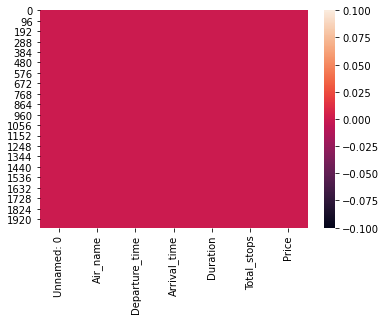

In [12]:
import seaborn as sns
sns.heatmap(df.isnull())

From the plot we can see that we have no null values in the dataset.

### We can also see that we have special characters in the dataset

In [13]:
# Removing special characters
df.Duration=df.Duration.str.replace("h","")

df.Duration=df.Duration.str.replace("m","")
df.Departure_time=df.Departure_time.str.replace(":","")
df.Arrival_time=df.Arrival_time.str.replace(":","")

In [14]:
df.head()

,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,Air Asia,1440,2225,7 45,Non Stop,"5,953"
1,1,Air Asia,2125,0645,9 20,Non Stop,"5,953"
2,2,Air Asia,2125,0715,9 50,Non Stop,"5,953"
3,3,Air Asia,2045,0645,10 00,Non Stop,"5,953"
4,4,Air Asia,2045,0715,10 30,Non Stop,"5,953"


Now we have nosuch characters.

### So let's apply Label encoding 
We can see that we have many columns in string format so we are using Label encoder to encode them.

## Label Encoding

In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [16]:
df=df.apply(le.fit_transform)
df

,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
0,0,0,18,35,25,0,4
1,1,0,31,6,27,0,4
2,2,0,31,7,28,0,4
3,3,0,27,6,1,0,4
4,4,0,27,7,2,0,4
...,...,...,...,...,...,...,...
1995,1995,2,10,26,23,0,3
1996,1996,1,5,11,11,0,3
1997,1997,3,4,9,12,0,3
1998,1998,1,7,13,12,0,3


Now we can see that we have encoded all the columns having object datatype using Label Encoder.

## Statistical Summary

In [17]:
df.describe()

,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.0,2000.000000
mean,999.500000,1.021000,16.645500,17.59000,13.397500,0.0,3.300000
std,577.494589,0.952372,10.554929,10.66648,6.772106,0.0,1.780895
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
25%,499.750000,0.000000,7.000000,8.00000,11.000000,0.0,2.000000
50%,999.500000,1.000000,17.000000,16.00000,13.000000,0.0,3.500000
75%,1499.250000,2.000000,27.000000,27.00000,16.000000,0.0,5.000000
max,1999.000000,3.000000,35.000000,37.00000,28.000000,0.0,6.000000


In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Univariate Analysis

For univariate analysis we are using box plot.

<AxesSubplot:>

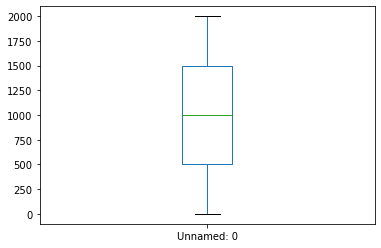

In [19]:
df['Unnamed: 0'].plot.box()

Here in the Unnamed column is unique thus we have no outliers in this column.

<AxesSubplot:>

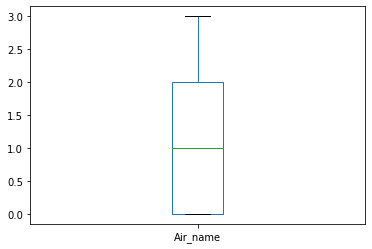

In [20]:
df['Air_name'].plot.box()

Here in the air name column we can see that we have median at 1 , where q1 and q3 are at 0 and 2 and maximum is at 3.

<AxesSubplot:>

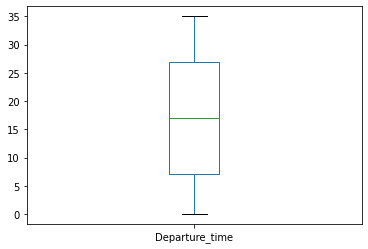

In [21]:
df['Departure_time'].plot.box()

Here in the departure time we have no outliers.

<AxesSubplot:>

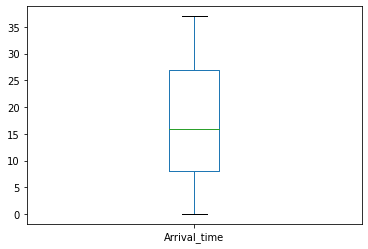

In [22]:
df['Arrival_time'].plot.box()

Here also in the arrival column we have no outliers.

<AxesSubplot:>

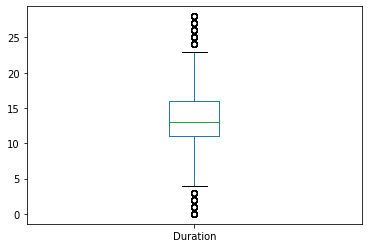

In [23]:
df['Duration'].plot.box()

Here  in the duration column we can see that we have many outliers as some of the duration are very long and some of are very short

<AxesSubplot:>

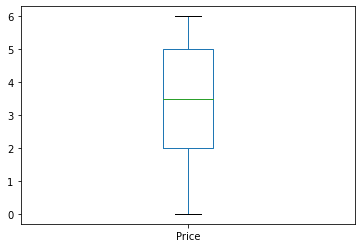

In [24]:
df['Price'].plot.box()

Here in the price column we have no outliers  where 6 is the highest price  and median is at 3.5.

# Bivariate analysis

Now we will use strip plot for bivariate analysis to see the relation of each column with the target column.

<AxesSubplot:xlabel='Air_name', ylabel='Price'>

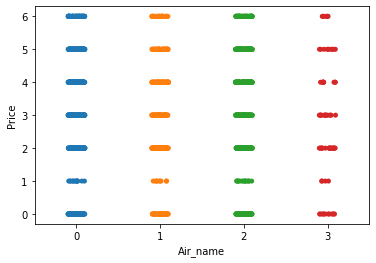

In [25]:
sns.stripplot(x=df['Air_name'],y=df['Price'])

Here in the columnwe can see the price range od each type of airline.

<AxesSubplot:xlabel='Departure_time', ylabel='Price'>

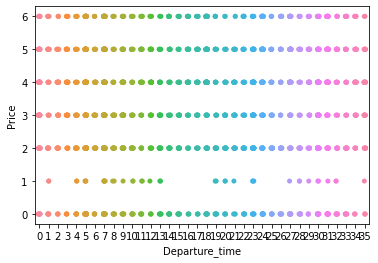

In [26]:
sns.stripplot(x=df['Departure_time'],y=df['Price'])

Here we can see the price range of all the departure time where wwe can see that lowest price has least departure time.

<AxesSubplot:xlabel='Arrival_time', ylabel='Price'>

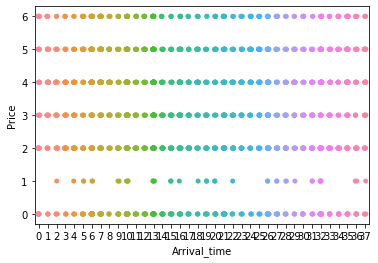

In [27]:
sns.stripplot(x=df['Arrival_time'],y=df['Price'])

Here we can see the price range of all the arrival time where wwe can see that lowest prices  has less no of arrival time.


<AxesSubplot:xlabel='Duration', ylabel='Price'>

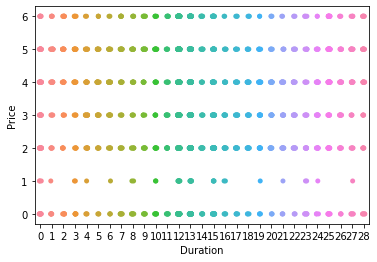

In [28]:
sns.stripplot(x=df['Duration'],y=df['Price'])

Here we can see the duration of the journey for each price range as the duration increase sprice range decreases.

# Multiariate Analysis

To check correlation

In [29]:
dfcor=df.corr()
dfcor


,Unnamed: 0,Air_name,Departure_time,Arrival_time,Duration,Total_stops,Price
Unnamed: 0,1.000000,0.007163,-0.001768,0.001312,-0.000805,NaN,-0.012150
Air_name,0.007163,1.000000,-0.199564,0.121694,-0.100111,NaN,-0.035276
Departure_time,-0.001768,-0.199564,1.000000,-0.026561,0.050080,NaN,0.039645
Arrival_time,0.001312,0.121694,-0.026561,1.000000,0.111422,NaN,-0.002475
Duration,-0.000805,-0.100111,0.050080,0.111422,1.000000,NaN,0.013792
Total_stops,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,-0.012150,-0.035276,0.039645,-0.002475,0.013792,NaN,1.000000


<AxesSubplot:>

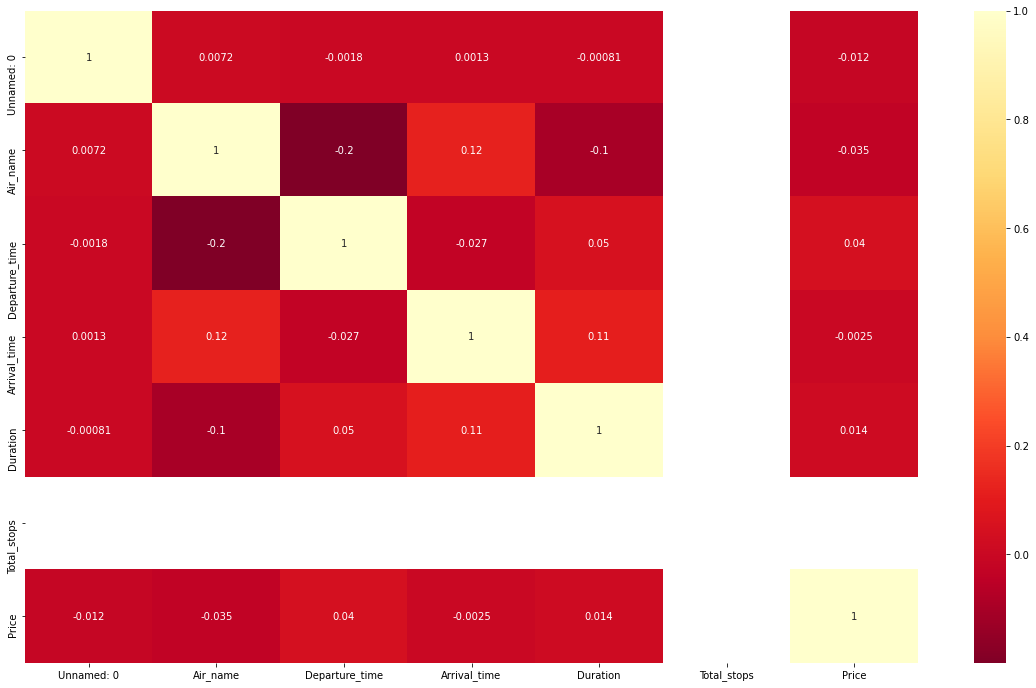

In [30]:
plt.figure(figsize=(20,12 ))
sns.heatmap(dfcor,annot=True,cmap='YlOrRd_r')

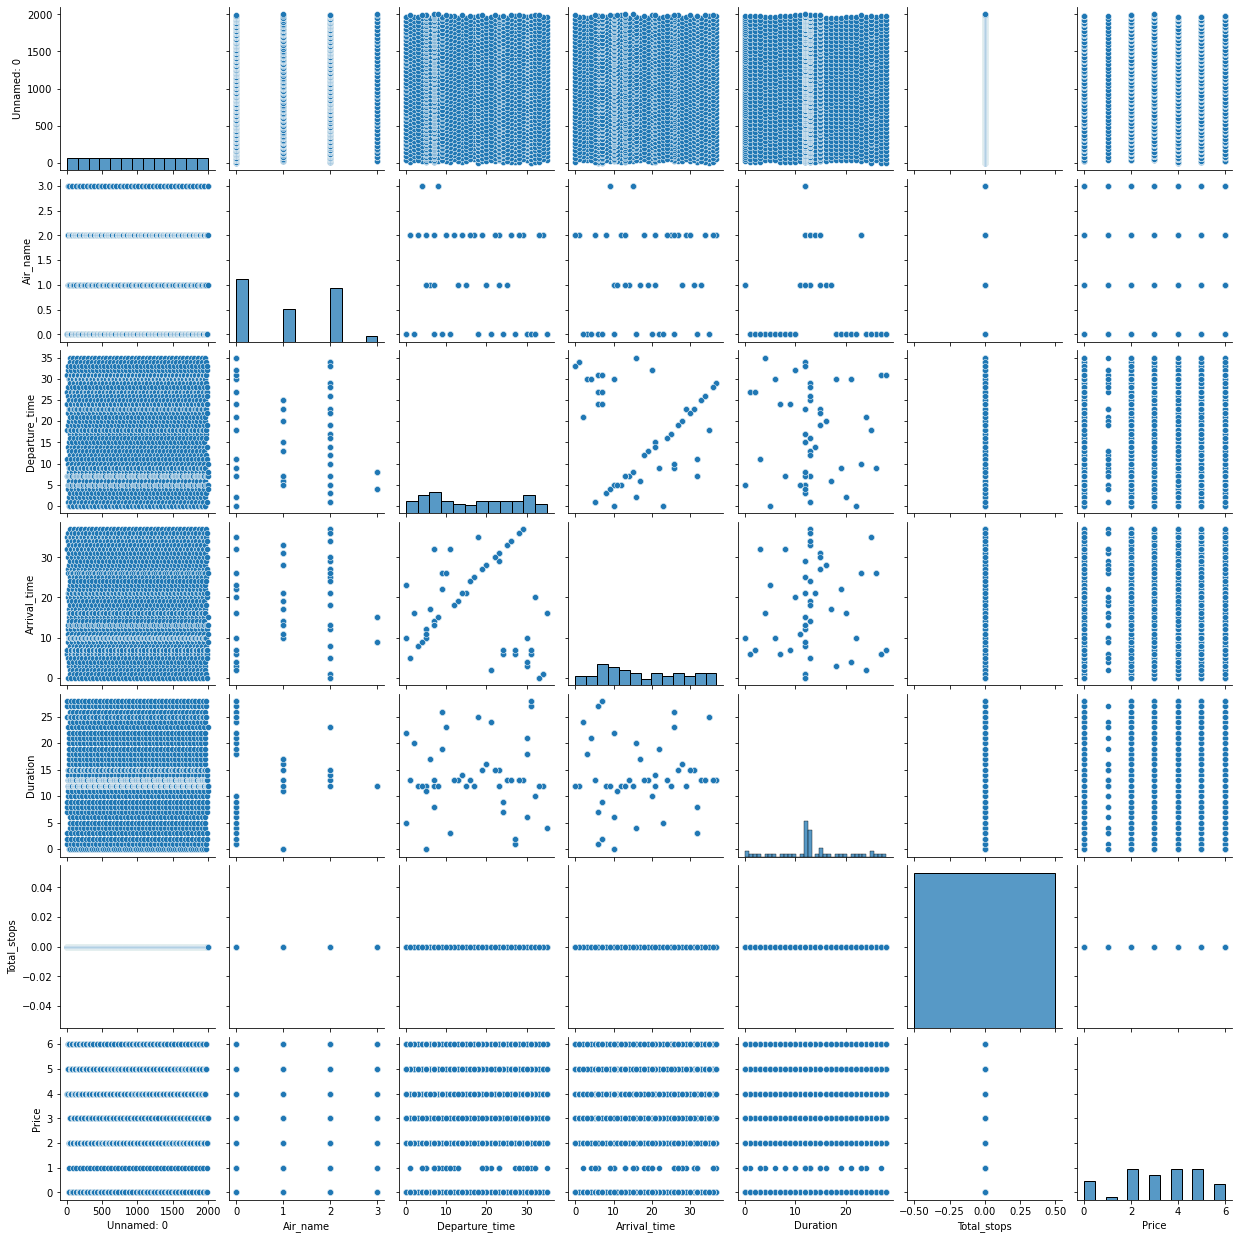

In [31]:
# another example of multivariate analysis
sns.pairplot(df)

Here we can clearly see the relation of each column with the other column.

# To check Skewness

<AxesSubplot:xlabel='Unnamed: 0', ylabel='Density'>

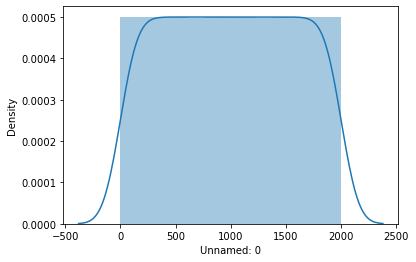

In [32]:
sns.distplot(df['Unnamed: 0'])

Here we can see the skewness the curve is not normally distributed from the top.

<AxesSubplot:xlabel='Air_name', ylabel='Density'>

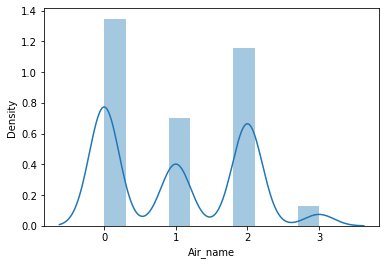

In [33]:
sns.distplot(df['Air_name'])

Here we can see that the curves are not normally distributed.

<AxesSubplot:xlabel='Departure_time', ylabel='Density'>

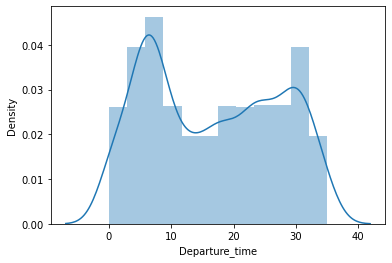

In [34]:
sns.distplot(df['Departure_time'])

Here also we can see the skewness in all the columns.

<AxesSubplot:xlabel='Arrival_time', ylabel='Density'>

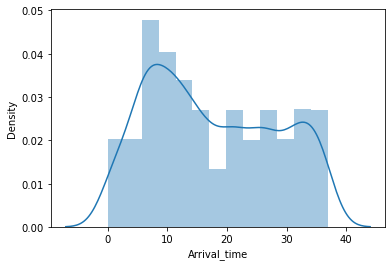

In [35]:
sns.distplot(df['Arrival_time'])

Here also we can see the skewness in all the columns

<AxesSubplot:xlabel='Duration', ylabel='Density'>

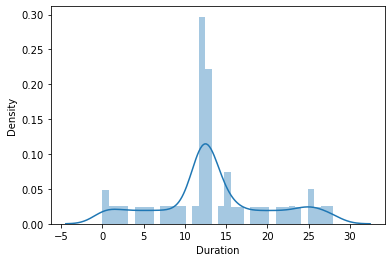

In [36]:
sns.distplot(df['Duration'])

Here also we can see the skewness in skewenss in the first and last curve.

From the above plots we have seen the skewness in all the columns.

# Data Cleaning

In [37]:
# Dropping the highly correlated columns.
df.drop('Air_name',axis=1,inplace=True)
df.drop('Total_stops',axis=1,inplace=True)

In [38]:
df.head()

,Unnamed: 0,Departure_time,Arrival_time,Duration,Price
0,0,18,35,25,4
1,1,31,6,27,4
2,2,31,7,28,4
3,3,27,6,1,4
4,4,27,7,2,4


Here we have dropped the air name column and total stops column.which are highly negatively correlated with the price column

In [39]:
df.shape

(2000, 5)

From the univariate and bivariate analysis we have seen that only few outliers are present, So no need to remove outliers.

## Separating independent variable and target variable.

In [40]:
x=df.drop('Price',axis=1)
y=df['Price']

In [41]:
df.skew()

Unnamed: 0        0.000000
Departure_time    0.101227
Arrival_time      0.229370
Duration          0.177030
Price            -0.351077
dtype: float64

Here we can see  that we have negaligible skewness. So no need to remove skewness.

# Creating Train Test split

In [42]:
x.shape

(2000, 4)

In [43]:
y.shape

(2000,)

In [44]:
y=y.values.reshape(-1,1)

In [45]:
y.shape

(2000, 1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)

In [48]:
x_train.shape

(1400, 4)

In [49]:
x_test.shape

(600, 4)

In [50]:
y_test.shape

(600, 1)

In [51]:
y_train.shape

(1400, 1)

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Finding Best Algorithm using multiple models

In [53]:
lm=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)

In [54]:
model=[lm,dtr,svr,knr,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('error:',m)
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error: LinearRegression()
Mean absolute error: 1.4797964755170336
Mean squared error: 3.1002716952721943
Root Mean Squared error: 1.7607588407479868
error: DecisionTreeRegressor()
Mean absolute error: 0.6116666666666667
Mean squared error: 1.8583333333333334
Root Mean Squared error: 1.3632070031119021
error: SVR()
Mean absolute error: 1.4921292555981438
Mean squared error: 3.385474514539556
Root Mean Squared error: 1.8399659003741227
error: KNeighborsRegressor()
Mean absolute error: 1.0556666666666665
Mean squared error: 2.3058
Root Mean Squared error: 1.5184860881812516
error: Lasso(alpha=0.0001)
Mean absolute error: 1.4797969530857704
Mean squared error: 3.1002696347290026
Root Mean Squared error: 1.760758255618585
error: Ridge(alpha=0.0001)
Mean absolute error: 1.4797964755163917
Mean squared error: 3.1002716952483813
Root Mean Squared error: 1.7607588407412247


Here we can see that we are getting least error with Decision tree and KNeighborsRegressor

In [55]:
#Let's check the r2_score for all the models

In [56]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('score:',m)
    print(r2_score(y_test,pred))

score: LinearRegression()
-0.003938774364736108
score: DecisionTreeRegressor()
0.3680057640464902
score: SVR()
-0.09629396028514425
score: KNeighborsRegressor()
0.2533293035380343
score: Lasso(alpha=0.0001)
-0.003938107113794942
score: Ridge(alpha=0.0001)
-0.003938774357024721


Here also we are getting highest accuracy with r2_score with Decision tree Regressor.

The accuracy can also be due to overfitting so we will check for cross validation.

# Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

score: LinearRegression()
[-0.00827564 -0.00706228 -0.03793808 -0.01035747  0.00130276]
-0.012466141845005363
score: DecisionTreeRegressor()
[-0.15457413 -0.09148265 -0.02050473  0.06624606 -0.02839117]
-0.045741324921135675
score: SVR()
[-0.13128914 -0.06904082 -0.03576841 -0.01008406 -0.03355605]
-0.0559476955750279
score: KNeighborsRegressor()
[-0.16529968 -0.11094637 -0.11940063 -0.12242902 -0.04302839]
-0.11222082018927448
score: Lasso(alpha=0.0001)
[-0.00827499 -0.00705931 -0.03793403 -0.01035532  0.00130405]
-0.012463921825023472
score: Ridge(alpha=0.0001)
[-0.00827564 -0.00706228 -0.03793808 -0.01035747  0.00130276]
-0.012466141830424405


From the cross validation score we have seen that DecisionTreeRegressor()has least cross validation score.

## Hyper parameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

## Hyper parameter tuning for DecisionTreeRegressor

In [60]:
dtr=DecisionTreeRegressor()
grid_param={'criterion':['mse','mae','friedman_mse','poisson']}
gd_sr=GridSearchCV(dtr,
                   scoring='accuracy',
                   param_grid=grid_param,
                   cv=5)
gd_sr.fit(x_train,y_train)
best_parameters=gd_sr.best_params_
print(best_parameters)


{'criterion': 'friedman_mse'}


In [61]:
dtr1=DecisionTreeRegressor(criterion= 'mse')
dtr1.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
dtr1.score(x_test,y_test)

0.3766410396871871

Here the accuracy is also 37% which is the best till now.

## Hyper parameter tuning for KNeighborsRegressor

In [64]:
param={'n_neighbors':np.arange(1,12,2),
      'weights':['uniform','distance']}
knr=KNeighborsRegressor()
gscv=GridSearchCV(knr,param,cv=5)
gscv.fit(x_train,y_train)

best_parameters=gscv.best_params_
print(best_parameters)

{'n_neighbors': 5, 'weights': 'distance'}


In [65]:
gscv.best_score_

0.33348466392422055

In [66]:
knr1=KNeighborsRegressor(n_neighbors=5, weights= 'distance')
knr1.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [67]:
knr1.score(x_test,y_test)

0.366292941265401

Here also the accuracy is also 36% which is best till now.

## So we are getting highest accuracy with the DecisionTreeRegressor after hyperparmeter tuning so this is our best model among all the models.¶

## Saving our best model

In [69]:
import joblib
joblib.dump(dtr1, "dtr1flightfile.obj")

dtr1_from_joblib =joblib.load("dtr1flightfile.obj")